In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [3]:
print("Welcome Bharath")

Welcome Bharath


In [4]:
df=pd.read_csv("/content/customer_churn_prediction_dataset.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [10]:
df.shape

(300, 21)

In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [14]:
df=df.drop(columns=['customerID'])

In [15]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes


In [19]:
nuerical_feature_list = ['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
  if col not in nuerical_feature_list:
    print(col, df[col].unique())
    print("********"*50)

gender ['Male' 'Female']
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
SeniorCitizen [0 1]
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Partner ['Yes' 'No']
************************************************************************************************************************************

In [20]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [21]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [23]:
df['Churn'].value_counts()

,count
Churn,
No,161
Yes,139


In [24]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [36]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()
  plt.axvline(col_median,color='green',linestyle="-",label="Median")
  plt.axvline(col_mean, color="red", linestyle="--",label="Mean")
  plt.legend()
  plt.show()


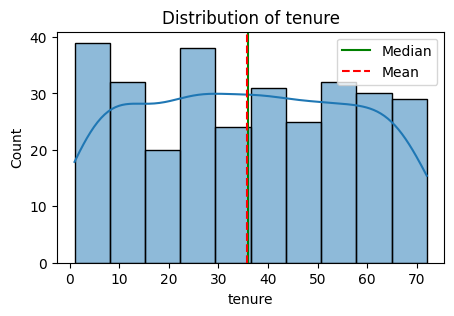

In [37]:
plot_histogram(df,"tenure")

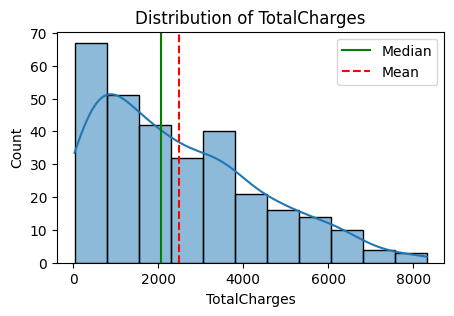

In [39]:
plot_histogram(df, "TotalCharges")

In [43]:
def box_plot(df, column_name):
  plt.figure(figsize=(5,3))
  plt.boxplot(df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.ylabel(column_name)
  plt.show()


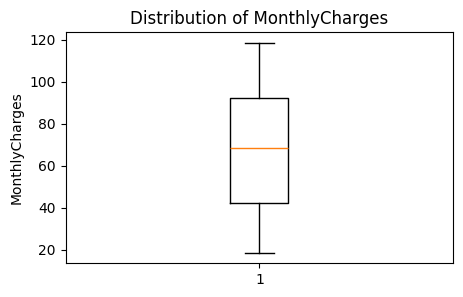

In [44]:
box_plot(df, "MonthlyCharges")

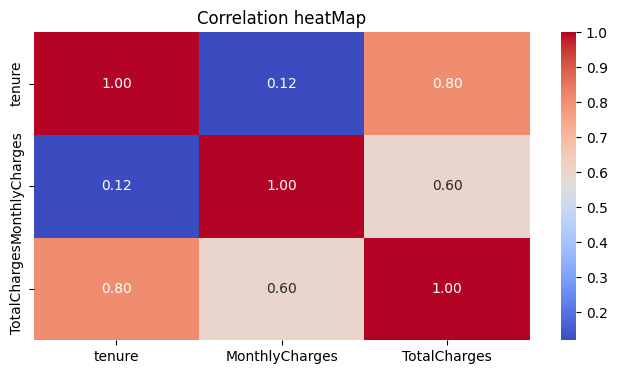

In [46]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', "TotalCharges"]].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatMap")
plt.show()

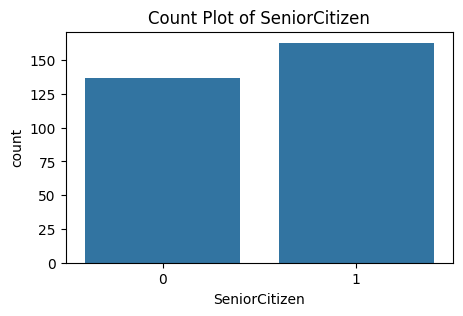

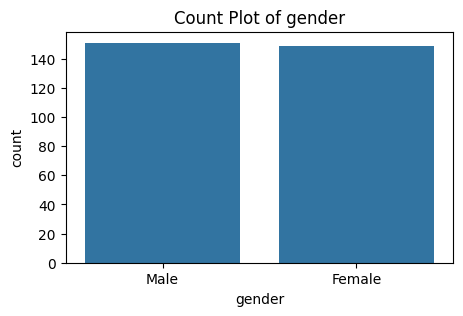

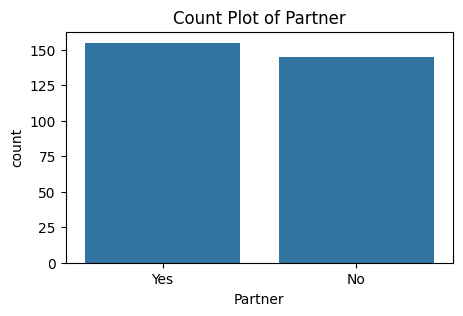

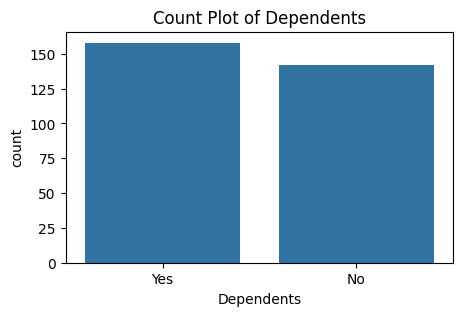

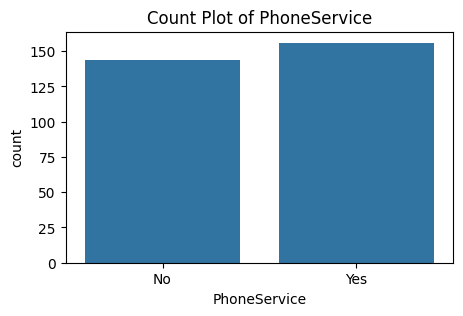

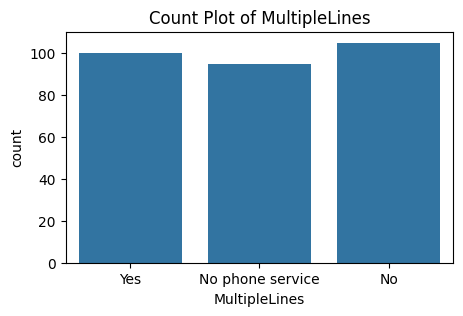

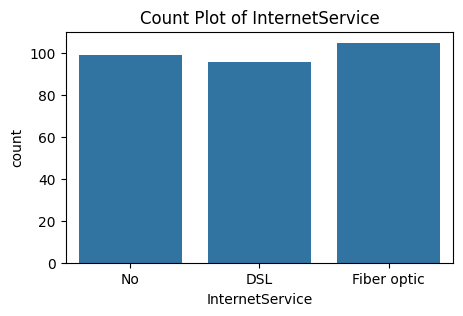

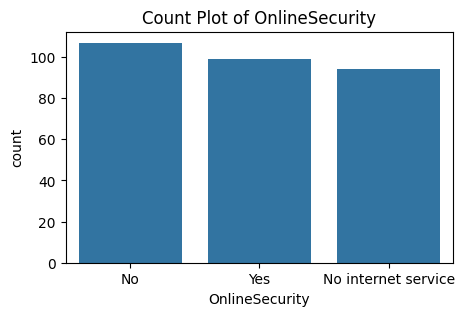

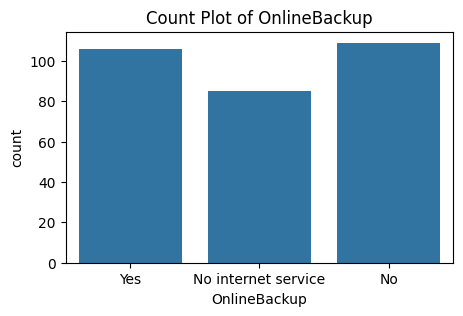

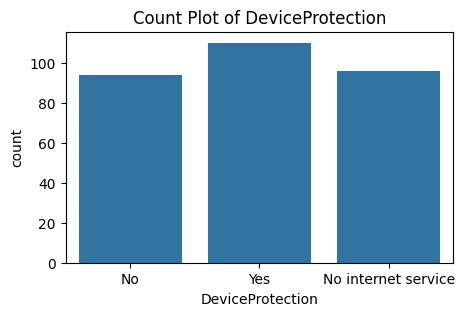

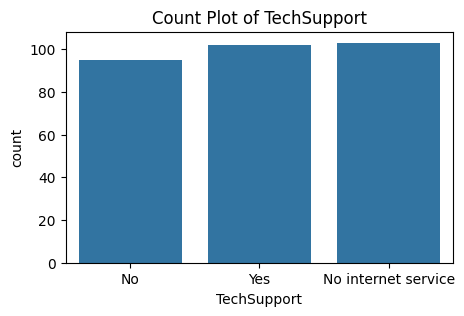

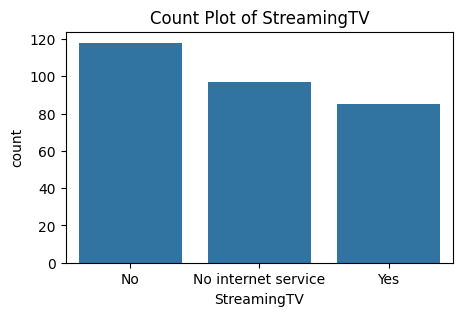

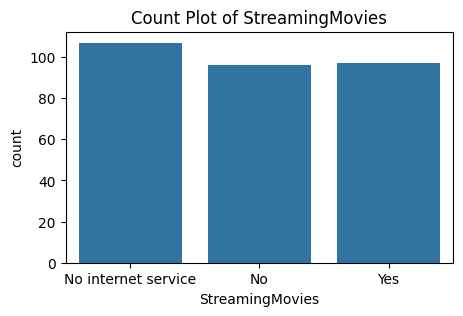

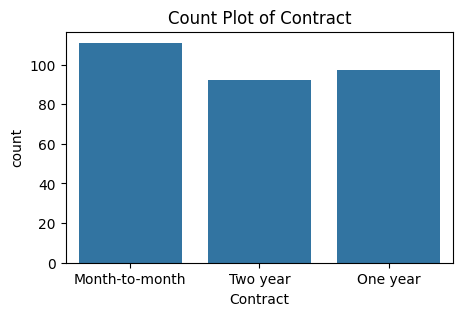

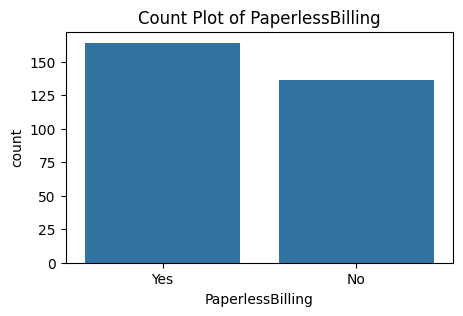

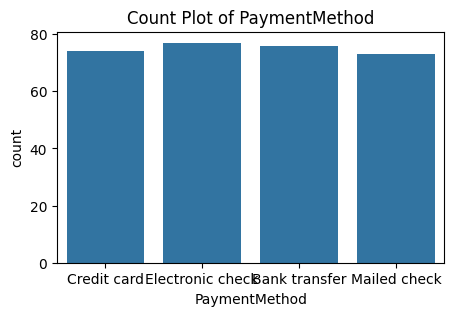

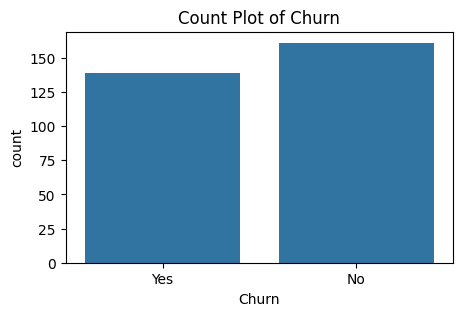

In [47]:
object_cols =df.select_dtypes(include='object').columns.to_list()
object_cols=['SeniorCitizen']+object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f'Count Plot of {col}')
  plt.show()

In [48]:
df["Churn"]=df['Churn'].replace({"Yes":1, "No":0})


<ipython-input-48-3aea3d805f50>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df['Churn'].replace({"Yes":1, "No":0})


In [49]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,1
1,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,1


In [51]:
df['Churn'].value_counts()

,count
Churn,
0,161
1,139


In [52]:
object_columns=df.select_dtypes(include='object').columns

In [53]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [54]:
encoders={}
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder

with open("encoder.pkl","wb") as f:
  pickle.dump(encoders, f)

In [55]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [56]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,5,0,2,2,0,2,0,0,0,1,0,1,1,27.43,137.15,1
1,0,0,0,0,42,1,1,0,2,2,0,0,1,1,2,0,2,38.28,1607.76,1


In [57]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [58]:
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(X_train.shape)

(240, 19)


In [60]:
X_test.shape

(60, 19)

In [61]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

In [63]:
cv_scores={}
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores=cross_val_score(model, X_train,y_train,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy:{np.mean(scores):.2f}")
  print("-"*30)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy:0.46
------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy:0.49
------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy:0.51
------------------------------


In [64]:
cv_scores

{'Decision Tree': array([0.29166667, 0.5       , 0.5625    , 0.47916667, 0.45833333]),
 'Random Forest': array([0.4375    , 0.4375    , 0.64583333, 0.47916667, 0.45833333]),
 'XGBoost': array([0.54166667, 0.45833333, 0.54166667, 0.52083333, 0.5       ])}